<a href="https://colab.research.google.com/github/Akanksha131313/AI_Projects_Journey/blob/main/01_ANN_Practical_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####**Install Tensor Flow-**

In [ ]:
! pip install tensor flow-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.3/227.3 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.5/343.5 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 87.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 96.0 MB/s eta 0:00:00
   ━━

####**Import Tensor Flow-**

In [ ]:
import tensorflow as tf

In [ ]:
# You can see the Version of tf :
print(tf.__version__)

2.19.0


##**Part-1 : Basic -**

####**Import Other Libraries -**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plot

In [ ]:
cm = pd.read_csv('Churn_Modelling.csv')
cm.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


####**Divide the datset into Dependent & Independent Features-**

In [ ]:
X= cm.iloc[:,3:13]
y= cm.iloc[:,13]

In [ ]:
X.head() #Independent Features

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y.head() #Dependent Feature

,Exited
0,1
1,0
2,1
3,0
4,0


####**Feature Engineering**

As we can observe , In X , there are two categorical variables(i.e. Gender & Geography ) -> We need to convert these 2 categorical columns into numerical .

----> Either u can use 'Hot Encoding' or 'get_dummies' to convert .

In [ ]:
# get_dummies ->
#i) use dtpe=int (to get 0 or 1) -> & use
# 'drop_first'=True (it means 'if first value(France column) & Female (Gender column))is true , then other will show 0' , by this it reduce the column of France or female)

geography = pd.get_dummies(X['Geography'],dtype=int,drop_first=True) # it reduce the column of 'France' by showing it True
gender = pd.get_dummies(X['Gender'],dtype=int, drop_first=True) # similarly it reduce the column of 'Female' by showing it True

In [ ]:
# concatenate these variables with dataframe('cm') :
#step-1 : To contenate , firstly Drop the previous 'categoricals colums
X.drop(['Geography','Gender'],axis=1,inplace=True) # Removed this line

In [ ]:
X.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
#step-2 : Concat the new columns that you have converted into binary or Numerical columns :
X = pd.concat([X,geography,gender],axis=1)

In [ ]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


####**Splitting the dataset into 'train set ' & 'test set'-**

In [ ]:
#Import -
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=0)

####**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [ ]:
X_train.shape

(8000, 11)

##**Part-2 : Lets create ANN-**

####**Import Important Libraries -**

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
# Let's initialise the ANN :
classifier = Sequential()

In [ ]:
#Adding the input Layer :
classifier.add(Dense(units=11,activation='relu'))  # you can observe , x_train.shape has 11 units/inputs

In [ ]:
#Adding the first Hidden Layer:
classifier.add(Dense(units=7,activation='relu')) # you can consider any number of neurons in hidden layer
classifier.add(Dropout(0.2)) # means 20% will be drop out randomly

In [ ]:
#Adding the second Hidden Layer:
classifier.add(Dense(units=6,activation='relu')) # again you can consider any number of neurons in hidden layer 2
classifier.add(Dropout(0.3)) # means 30% will be drop out randomly

In [ ]:
#Adding the Output Layer:
classifier.add(Dense(units=1,activation='sigmoid')) # you can consider any number of neurons in output layer , but In Binary , it require 1 (final output)

In [ ]:
# Now quickly train my entire NN :
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) #adam optimizer is best till date ., In metrics , i will focus on 'accuracy'

In [ ]:
#Assign ur own learning rate
# import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
#Now again quickly train my entire NN :
classifier.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss='binary_crossentropy',metrics=['accuracy'])

####**Early Stopping -**

In [ ]:
# early Stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',patience=20,verbose=1,mode='auto',baseline=None, restore_best_weights=False)

In [ ]:
# Train our NN :
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7940 - loss: 0.4934 - val_accuracy: 0.7955 - val_loss: 0.3957
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8018 - loss: 0.3771 - val_accuracy: 0.8531 - val_loss: 0.3928
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8388 - loss: 0.3979 - val_accuracy: 0.7955 - val_loss: 0.4397
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8394 - loss: 0.3785 - val_accuracy: 0.8512 - val_loss: 0.4171
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8406 - loss: 0.3875 - val_accuracy: 0.8504 - val_loss: 0.4042
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8571 - loss: 0.3643 - val_accuracy: 0.8501 - val_loss: 0.4053
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8590 - loss: 0.3769 - val_accuracy: 0.8501 - val_loss: 0.4051
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8563 - loss: 0.3773 - 

In [ ]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

####**Plotting -**

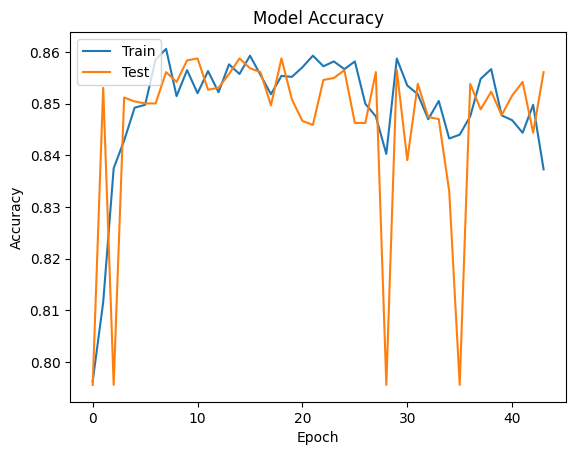

In [ ]:
# Summaize the history for accuracy:
plot.plot(model_history.history['accuracy'])
plot.plot(model_history.history['val_accuracy'])
plot.title('Model Accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train','Test'],loc='upper left')
plot.show()


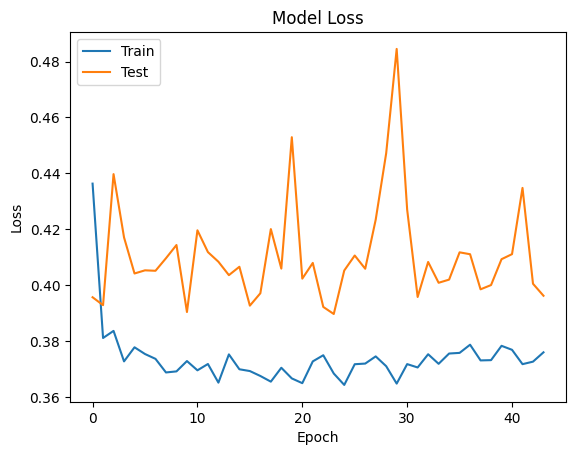

In [ ]:
# Summarise the history for loss :
plot.plot(model_history.history['loss'])
plot.plot(model_history.history['val_loss'])
plot.title('Model Loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train','Test'],loc='upper left')
plot.show()

##**Part-3 : Making the Prediction & Evaluating the Model -**

####**Predict the test results-**

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


###**Make the Confusion Matrix-**

In [ ]:
# Import the confusion Matrix :
from sklearn.metrics import confusion_matrix
c_m = confusion_matrix(y_test,y_pred)
c_m

array([[1504,   91],
       [ 196,  209]])

In [ ]:
# Calculate the accuracy score :
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
score

0.8565

####**Weights -**

In [ ]:
# Check weights :
classifier.get_weights()

[array([[  0.4938626 ,  -6.676704  ,   2.5614648 ,   2.2057505 ,
           0.68694085,  -0.02111703,   0.4551744 ,   2.8386717 ,
          -0.80893576,  -2.088133  ,  -3.3935611 ],
        [  9.543879  ,   3.3474212 ,  -2.8400948 ,   2.9195213 ,
          -0.10808734,  -7.3760962 ,   8.32352   ,  -4.4486947 ,
           1.6763932 ,   6.053448  ,  -1.2189493 ],
        [ -1.4784306 ,   2.359485  ,  -3.8988008 ,   4.5533433 ,
           0.32212463,  -1.3434579 ,   1.4074756 ,   0.22120091,
           0.56391704,  -0.01956488,   4.4289055 ],
        [  6.6823044 ,  -6.5387692 ,  -5.4008493 ,  -3.7707078 ,
         -13.227458  ,  -0.0400372 ,  -0.80459267,   3.278097  ,
           0.47341177,  -9.685843  ,  -1.177304  ],
        [  4.0231915 ,  -1.0615996 ,  -0.9261975 ,   0.22102533,
           3.4119935 ,   3.0093265 ,   0.8185145 ,  -4.1880584 ,
          10.244227  ,  -5.456888  ,   5.359043  ],
        [ -1.566651  ,  -5.5595603 ,   0.978268  ,  -0.11856762,
           0.11418159,   